# Simple linear regression

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#model libraries
import statsmodels.api as sm
from statsmodels.tools import add_constant
pd.set_option('display.max_columns', 50)


In [2]:
#get the dataset 
print(sns.get_dataset_names(), end=" ")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic'] 

In [3]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
#load the dataset
df = sns.load_dataset("mpg")
#select only numerical columns
df= df.select_dtypes("number")

#check top 4 rows
df[:4]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70


In [5]:
#check missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [6]:
#drop the null values if any
df.dropna(inplace=True)
#check any null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

0

## Simple Linear Regresssion

we model one feature against the target variable

In [8]:
#seperate a feature from a label
X = df["horsepower"]
y = df["mpg"]

In [9]:
#add constant
x_con = add_constant(X)

In [10]:
#create Ols model

model1 = sm.OLS(y, x_con).fit()

In [11]:
#check model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        19:17:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

In [12]:
#seperate features from labels
X = df.drop("mpg", axis=1) #feature
y = df["mpg"] # label

#add constant
X_con1 = add_constant(X)

In [13]:
#create model
model2 = sm.OLS(y,X_con1)
model2 = model2.fit()

In [14]:
#check model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          3.79e-135
Time:                        19:17:10   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model_year       0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#load the dataset
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
#check the shape
df.shape

(398, 9)

In [36]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [37]:
#concise stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [115]:
#stat for cat columns
df.describe(include="O").T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [58]:
#check unique values
for i in df1.columns:
    uniq_val = df1[i].unique()
    print(f'Column name: {i}\n, {uniq_val}\n')
    print("****"*20)
    

Column name: mpg
, [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

********************************************************************************
Column name: cylinders
, [8 4 6 3 5]

********************************************************************************
Column name: displacement
, [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  

Data cleaning

In [119]:
#create copy
df1 = df.copy(deep=True)

In [108]:
#remove white space from the column
df1.columns = df1.columns.str.replace(" ", "_").str.lower()
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [67]:
#check for missing values
df1.isnull().sum()/len(df1)*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

1.0873262824048695


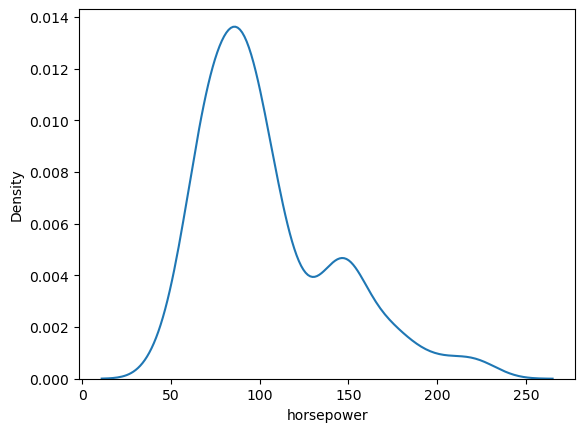

In [63]:
sns.kdeplot(df1["horsepower"])
print(df1["horsepower"].skew())

In [120]:
horse_mean = df1["horsepower"].mean()
horse_mean

df1["horsepower"] = df1["horsepower"].fillna(horse_mean)
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [122]:
#feature engineering/model year
df1["full_year"] = df1["model_year"] + 1900
del df1["model_year"]
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name,full_year
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu,1970
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320,1970
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite,1970
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst,1970
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino,1970


In [123]:
from datetime import datetime

current_year = datetime.now().year

df1["car_years"] =np.subtract(current_year, df1["full_year"])
del df1["full_year"]
del df1["name"]
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car_years
0,18.0,8,307.0,130.0,3504,12.0,usa,55
1,15.0,8,350.0,165.0,3693,11.5,usa,55
2,18.0,8,318.0,150.0,3436,11.0,usa,55
3,16.0,8,304.0,150.0,3433,12.0,usa,55
4,17.0,8,302.0,140.0,3449,10.5,usa,55


<Axes: >

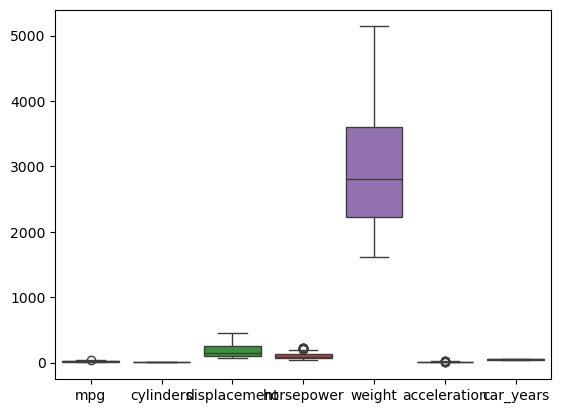

In [112]:
#check outliers
sns.boxplot(df1)

Observation: we have outliers but are genuine
    

<Axes: ylabel='mpg'>

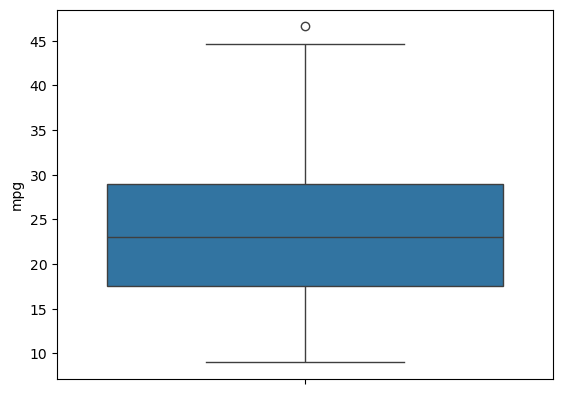

In [113]:
sns.boxplot(df1["mpg"])

## EDA

* univariate
* bivariate analysis
* multivariate analysis

## Pre-Processing

In [131]:
#Preprocessing

#scaling,log tranformation, encodeing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder

In [173]:
#do one hot encoding
orin_one = df1[["origin"]]

ohe = OneHotEncoder(drop="first", sparse_output=False, dtype="int")

encoded_col = ohe.fit_transform(orin_one)
encoded_col


array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [138]:
df1["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [142]:
origin_encode = pd.get_dummies(orin_one, drop_first=True, dtype="int")
origin_encode

,origin_japan,origin_usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [150]:
df2 = pd.concat([df1, origin_encode], axis=1)
del df2["origin"]
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_years,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,55,0,1
1,15.0,8,350.0,165.0,3693,11.5,55,0,1
2,18.0,8,318.0,150.0,3436,11.0,55,0,1
3,16.0,8,304.0,150.0,3433,12.0,55,0,1
4,17.0,8,302.0,140.0,3449,10.5,55,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,43,0,1
394,44.0,4,97.0,52.0,2130,24.6,43,0,0
395,32.0,4,135.0,84.0,2295,11.6,43,0,1
396,28.0,4,120.0,79.0,2625,18.6,43,0,1


In [156]:
#divide data into label and features
X = df2.drop("mpg", axis=1)
y = df2.mpg

In [160]:
X.shape

(398, 8)

## Train Test split

In [162]:
#split data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

x_train.shape , y_train.shape

((318, 8), (318,))

In [161]:
x_test.shape, y_test.shape

((80, 8), (80,))

## scaling

In [166]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

#instantiate the scaler
std_s = StandardScaler()

x_train_s = std_s.fit_transform(x_train)
x_test_s = std_s.transform(x_test)

## Modeling

In [208]:
#import the library
from sklearn.linear_model import LinearRegression


#create the lr
model1 = LinearRegression()
model1.fit(x_train_s, y_train)

LinearRegression()

In [211]:
model1.

array([-0.27544311,  2.01366001, -0.49384575, -5.93612313,  0.20236728,
       -2.9765687 , -0.11612639, -1.42927724])

In [170]:
#check training score
model1.score(x_train_s, y_train)

0.8188288951042786

In [184]:
#made prediction
y_pred = model1.predict(x_test_s)